# Lógica difusa

https://pythonhosted.org/scikit-fuzzy/



https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.html#recommended-use

In [1]:
#!pip install scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [3]:
# Generamos los universos de variables
#   * Calidad de comida y servicio son rangos subjetivos [0, 10]
#   * La propina tiene un rango de 0 a 25 en puntos percentuales
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)

fuzz.trimf
fuzz.gaussmf
fuzz.gbellmf
fuzz.trapmf

In [4]:
# Generamos las funciones de pertenencia difusas
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])

#qual_lo = fuzz.gaussmf(x_qual, 2, 2)
#qual_md = fuzz.gaussmf(x_qual, 5, 1)
#qual_hi = fuzz.gaussmf(x_qual, 8, 0.5)

serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])

tip_lo = fuzz.trimf(x_tip, [0, 0, 10])
tip_md = fuzz.trimf(x_tip, [0, 10, 25])
tip_hi = fuzz.trimf(x_tip, [10, 25, 25])

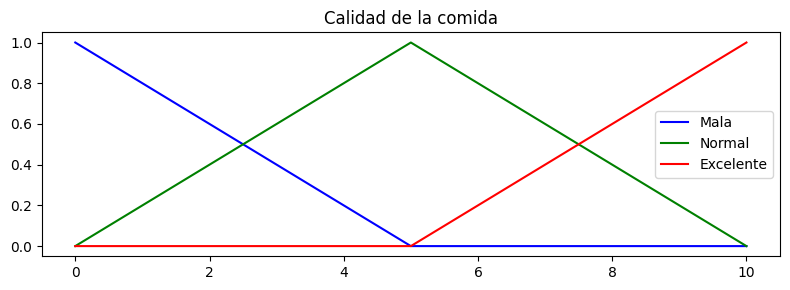

In [5]:
# Graficamos la calidad de la comida
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Mala')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Normal')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Excelente')
ax0.set_title('Calidad de la comida')
ax0.legend()

plt.tight_layout()

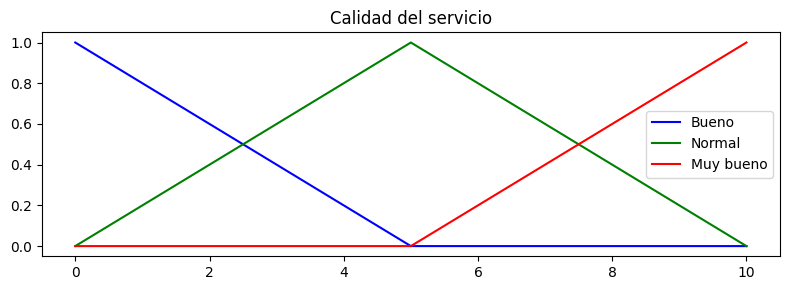

In [6]:
# Graficamos la calidad del servicio
fig, ax1 = plt.subplots(figsize=(8, 3))

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Bueno')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Normal')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Muy bueno')
ax1.set_title('Calidad del servicio')
ax1.legend()

plt.tight_layout()

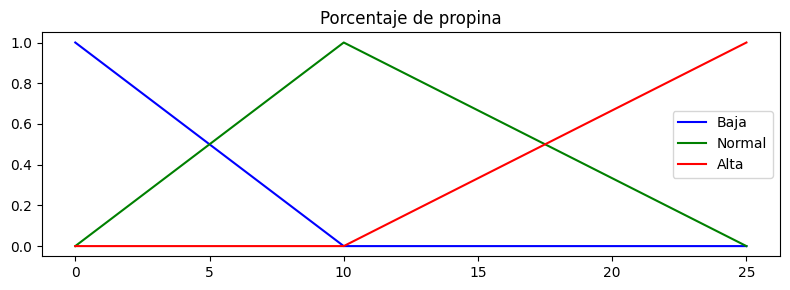

In [7]:
# Graficamos el porcentaje de propina
fig, ax2 = plt.subplots(figsize=(8, 3))

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Baja')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Normal')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='Alta')
ax2.set_title('Porcentaje de propina')
ax2.legend()

plt.tight_layout()

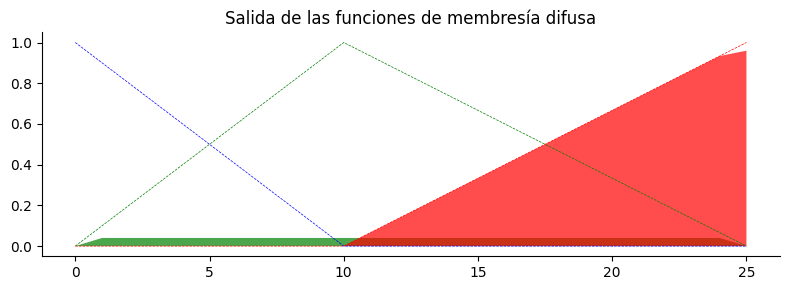

In [8]:
# Necesitamos la activación de nuestras funciones de pertenencia difusa en estos valores.
# Los valores específicos 6.5 y 9.8 se toman de la entrada del usuario.
# Si tuvieramos la calidad de la comida y el servicio en variables, podríamos usarlos aquí.

qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 6.5)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 6.5)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 6.5)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 9.8)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 9.8)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 9.8)

# Ahora tomamos nuestras reglas y las aplicamos. La regla 1 se refiere a la mala comida o servicio.
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)

# Ahora aplicamos esta regla a nuestra función de salida
# Si es mala comida o servicio, la propina será baja

tip_activation_lo = np.fmin(active_rule1, tip_lo)

# Para la regla 2, conectamos el servicio aceptable con una propina media
tip_activation_md = np.fmin(serv_level_md, tip_md)

# Para la regla 3, conectamos la comida buena y servicio excelente con una propina alta
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)

# Graficamos las funciones de pertenencia de salida
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Salida de las funciones de membresía difusa')

# Sacamos el eje superior y derecho
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

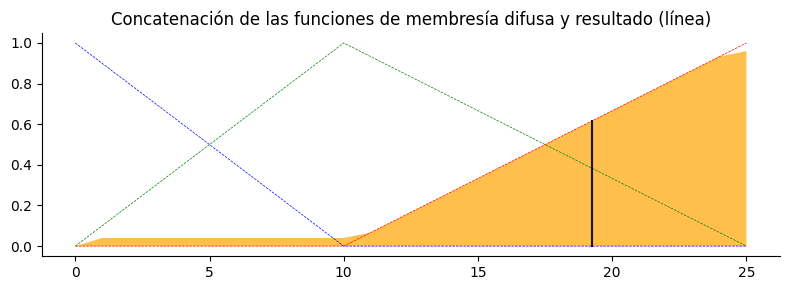

In [9]:
# Concatenamos las tres funciones de pertenencia de salida juntas
aggregated = np.fmax(tip_activation_lo,
                     np.fmax(tip_activation_md, tip_activation_hi))

# Calculamos el resultado difuso
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)

# Graficamos el resultado
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Concatenación de las funciones de membresía difusa y resultado (línea)')

# Sacamos el eje superior y derecho
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

Defuzzificación (imaginemos que es una palabra válida)

Aplicamos lógica difusa.. ahora, ¿Cuánto dejamos de propina?

Hay varios métodos, chequear skfuzzy.defuzz.

?fuzz.defuzz()

(x: Any, mfx: Any, mode: Any) -> Any
Defuzzification of a membership function, returning a defuzzified value
of the function at x, using various defuzzification methods.

Parameters

x : 1d array or iterable, length N
    Independent variable.
mfx : 1d array of iterable, length N
    Fuzzy membership function.
mode : string
    Controls which defuzzification method will be used.


'centroid': Centroid of area

'bisector': bisector of area

'mom'     : mean of maximum

'som'     : min of maximum

'lom'     : max of maximum

In [10]:

# Generamos una función de membresía trapezoidal en rango [0, 1]

x = np.arange(0, 5.05, 0.1)
mfx = fuzz.trapmf(x, [2, 2.5, 3, 4.5])

# Defuzzificamos esta función de membresía cinco maneras
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid') 
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')

# Mostramos los resultados
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum',
          'max of maximum']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]


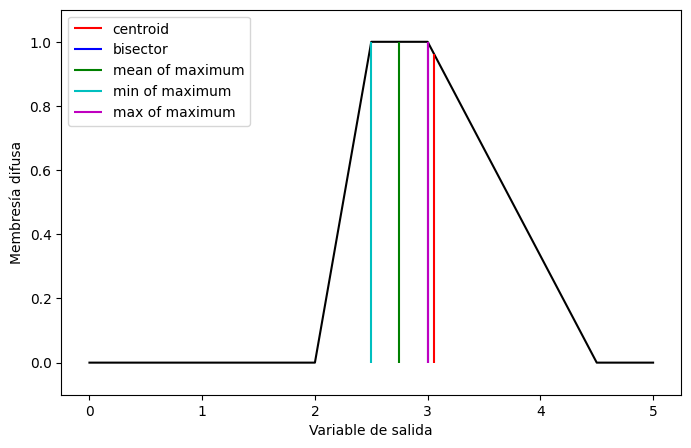

In [11]:
# Graficamos y comparamos los métodos de defuzzificación contra la función de membresía
plt.figure(figsize=(8, 5))

plt.plot(x, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Membresía difusa')
plt.xlabel('Variable de salida')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

plt.show()